# Task Name : Stock Market Prediction And Forecasting Using Stacked LSTM

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Loading Or Reading The CSV File

In [2]:
NSE_DataFrame = pd.read_csv("TATAGLOBAL.csv") # Reading the csv file using pandas.
NSE_DataFrame

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
NSE_DataFrame.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
NSE_DataFrame.shape

(2035, 8)

In [5]:
NSE_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
NSE_DataFrame.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
NSE_DataFrame.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

## Data Sorting

In [8]:
NSE_DataFrame['Date']=pd.to_datetime(NSE_DataFrame['Date'])
print(type(NSE_DataFrame.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
Sort_Data=NSE_DataFrame.sort_values(by='Date') # Sorting the values with respect to date in ascending order
Sort_Data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [10]:
Sort_Data.reset_index(inplace=True)
Sort_Data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [11]:
Sort_Data.reset_index(inplace=True)
Sort_Data.head()

,level_0,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [12]:
NSE_DataFrame.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [13]:
NSE_DataFrame['Close'].value_counts()

155.55    6
154.85    6
141.90    6
147.65    5
140.80    5
         ..
124.95    1
124.40    1
119.25    1
118.05    1
116.60    1
Name: Close, Length: 1313, dtype: int64

## Correlation Matrix

<AxesSubplot:>

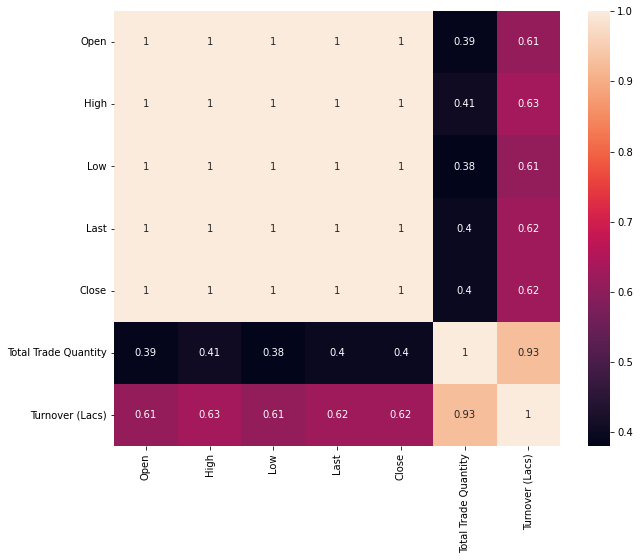

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(NSE_DataFrame.corr(),annot=True)

## Data Visualization

Text(0.5, 1.0, 'Stock Prediction')

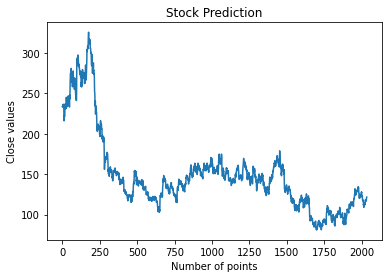

In [15]:
plt.plot(NSE_DataFrame['Close'])
plt.xlabel("Number of points")
plt.ylabel("Close values")
plt.title("Stock Prediction")

Text(0.5, 1.0, 'Stock Prediction')

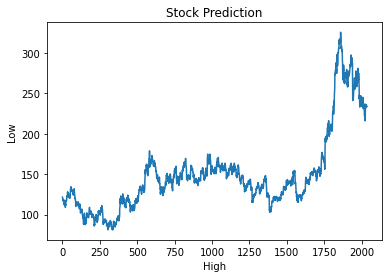

In [16]:
plt.plot(Sort_Data['Close'])
plt.xlabel("High")
plt.ylabel("Low")
plt.title("Stock Prediction")

In [17]:
Data_Frame=Sort_Data['Close']
Data_Frame

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

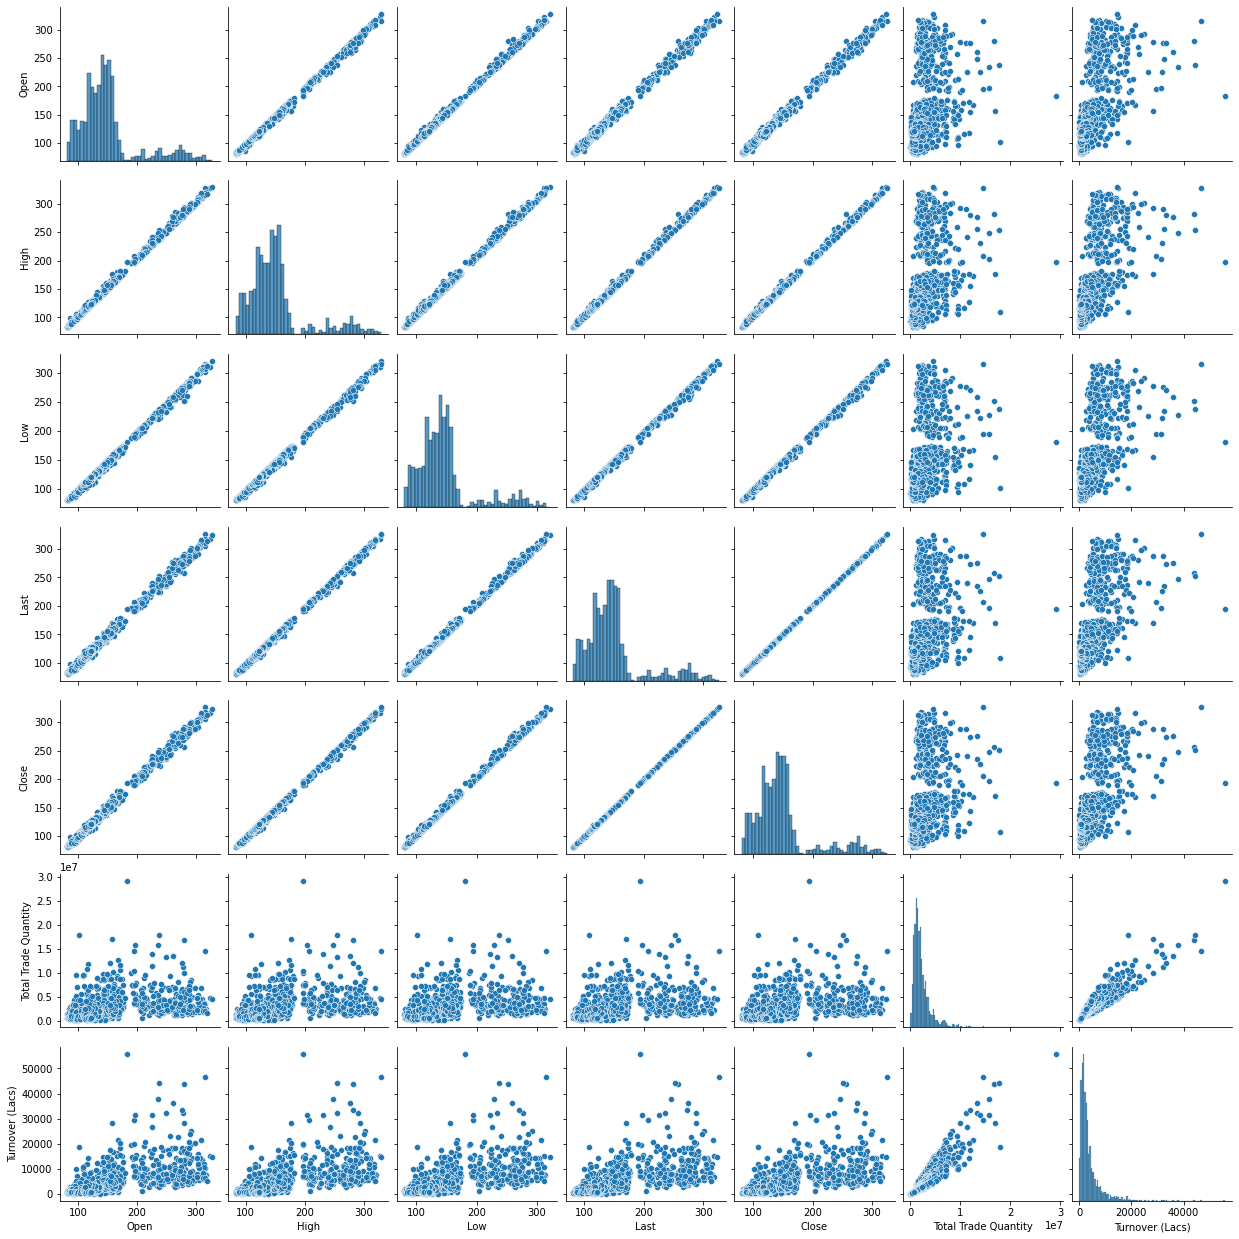

In [18]:
sns.pairplot(NSE_DataFrame)

## Min Max Scaler

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
Df_Array=scaler.fit_transform(np.array(Data_Frame).reshape(-1,1))
Df_Array

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## Spliting the Dataset

In [20]:
training_size=int(len(Df_Array)*0.70)
test_size=len(Df_Array)-training_size
train_data,test_data=Df_Array[0:training_size,:],Df_Array[training_size:len(Df_Array),:1]

## Convert an array of values into a dataset matrix

In [21]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

## Splitting Data into Train and Test

In [22]:
time_step = 100
X_train,Y_train = create_dataset(train_data, time_step)
X_test,Y_test = create_dataset(test_data, time_step)

In [23]:
print("Number of rows and columns in the X_train dataset is",X_train.shape) # Shows the shape of the data variable in tuple format i.e. no. of rows and column.
print("Number of rows and columns in the Y_train dataset is",Y_train.shape) # Shows the shape of the data variable in tuple format i.e. no. of rows and column.
print("Number of rows and columns in the X_test dataset is",X_test.shape) # Shows the shape of the data variable in tuple format i.e. no. of rows and column.
print("Number of rows and columns in the Y_test dataset is",Y_test.shape)

Number of rows and columns in the X_train dataset is (1323, 100)
Number of rows and columns in the Y_train dataset is (1323,)
Number of rows and columns in the X_test dataset is (510, 100)
Number of rows and columns in the Y_test dataset is (510,)


In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Creating the LSTM Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
19/19 [==============================] - 3s 152ms/step - loss: 5.4422e-04 - val_loss: 6.0456e-04
Epoch 2/10
19/19 [==============================] - 3s 148ms/step - loss: 5.3767e-04 - val_loss: 5.6873e-04
Epoch 3/10
19/19 [==============================] - 3s 155ms/step - loss: 5.6989e-04 - val_loss: 9.0353e-04
Epoch 4/10
19/19 [==============================] - 3s 148ms/step - loss: 6.3710e-04 - val_loss: 5.8049e-04
Epoch 5/10
19/19 [==============================] - 3s 152ms/step - loss: 5.5491e-04 - val_loss: 5.4163e-04
Epoch 6/10
19/19 [==============================] - 3s 143ms/step - loss: 5.1962e-04 - val_loss: 5.7392e-04
Epoch 7/10
19/19 [==============================] - 3s 142ms/step - loss: 4.8482e-04 - val_loss: 5.9938e-04
Epoch 8/10
19/19 [==============================] - 3s 142ms/step - loss: 4.6630e-04 - val_loss: 5.6047e-04
Epoch 9/10
19/19 [==============================] - 3s 145ms/step - loss: 4.8327e-04 - val_loss: 5.4071e-04
Epoch 10/10
19/19 [=========

## Prediction and Checking Performance

In [27]:
test_predict=model.predict(X_test)

In [28]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[82.35455 ],
       [82.35972 ],
       [82.36415 ],
       [82.36608 ],
       [82.36588 ],
       [82.36374 ],
       [82.36101 ],
       [82.35835 ],
       [82.35552 ],
       [82.35261 ],
       [82.35001 ],
       [82.34902 ],
       [82.34929 ],
       [82.35191 ],
       [82.35756 ],
       [82.362686],
       [82.367004],
       [82.37112 ],
       [82.37491 ],
       [82.38223 ],
       [82.39291 ],
       [82.40661 ],
       [82.422714],
       [82.43903 ],
       [82.4563  ],
       [82.473076],
       [82.48928 ],
       [82.50553 ],
       [82.520966],
       [82.535286],
       [82.54886 ],
       [82.56028 ],
       [82.567726],
       [82.56841 ],
       [82.56317 ],
       [82.55289 ],
       [82.538666],
       [82.520645],
       [82.49876 ],
       [82.472565],
       [82.443474],
       [82.41271 ],
       [82.37976 ],
       [82.346596],
       [82.31227 ],
       [82.27675 ],
       [82.242065],
       [82.20845 ],
       [82.17689 ],
       [82.14651 ],


## Calculating performance

In [29]:
import math
from sklearn.metrics import mean_squared_error

In [30]:
performance = math.sqrt(mean_squared_error(Y_test,test_predict))
performance

0.5531716924167942